# Old one
# old one 
# old one


### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
whr_df = pd.read_csv('data/WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [3]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'], 
                                       q=5, 
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
# y_test_labels = y_test.astype('category').cat.codes

Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

In [4]:
# Your answer: The "y_train.astype('category')" code converts the categorical labels that had been assigned to y_train into numerical variable by assigning an integer to each category.
# The difference between y_train_labels and y_train is that y_train contains a string variable while y_train_labels contains integer variables

<h3> Add new data

In [5]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("data/newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [6]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.


# Check common countries
common_countries = set(X_train['country']).intersection(set(countrydata['country_name']))
print(f"Number of common countries: {len(common_countries)}")

# Merge the datasets using an inner join
X_train = X_train.merge(countrydata, left_on='country', right_on='country_name', how='inner')
X_test = X_test.merge(countrydata, left_on='country', right_on='country_name', how='inner')

# Drop duplicate 'country_name' column (if needed)
X_train = X_train.drop(columns=['country_name'])
X_test = X_test.drop(columns=['country_name'])

Number of common countries: 89


In [7]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


## 1.  EDA

In [8]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                         int64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [ ]:
The output represents the data types of the columns in a pandas DataFrame, x_train.
DATA TYPES:

Object (categorical/string) - country and region
Float64 (continuous numerical variables) - gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, perceptions_of_corruption, population_below_poverty_line, hdi, life_expectancy, expected_years_of_schooling, mean_years_of_schooling and gni.
int64 (Discrete numerical variable) - population.

The dataset consists of both categorical and numerical variables. Categorical columns can be used for groping or merging, while numerical columns provide economic indicators.

Float64 columns suggest potential scaling for models sensitive to feature magnitudes

Find out the number and percentage of missing values in the table per column

In [9]:
# Find the number of missing values per column
missing_values = X_train.isnull().sum()

# Calculate the percentage of missing values per column
missing_percentage = (missing_values / len(X_train)) * 100

# Combine the results into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# Display columns with missing values
missing_data[missing_data['Missing Values'] > 0]


,Missing Values,Percentage (%)
population_below_poverty_line,10,11.235955
life_expectancy,1,1.123596
expected_years_of_schooling,1,1.123596
mean_years_of_schooling,1,1.123596
gni,1,1.123596


Plot the frequency distribution / histogram of some of the numerical features that you think are important

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

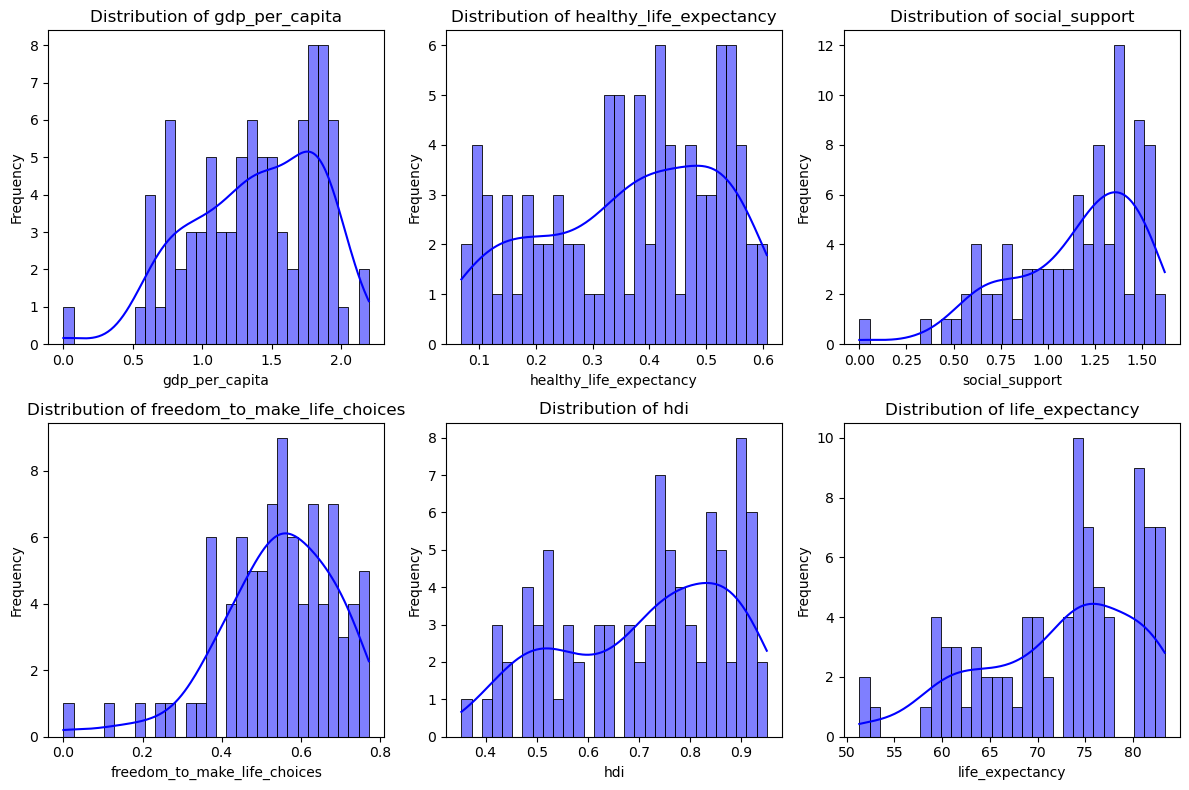

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select important numerical features for visualization
num_features = ['gdp_per_capita', 'healthy_life_expectancy', 'social_support', 
                'freedom_to_make_life_choices', 'hdi', 'life_expectancy']

# Set figure size
plt.figure(figsize=(12, 8))

# Loop through selected features and create subplots
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_train[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Plot the categorical variables and their distribution

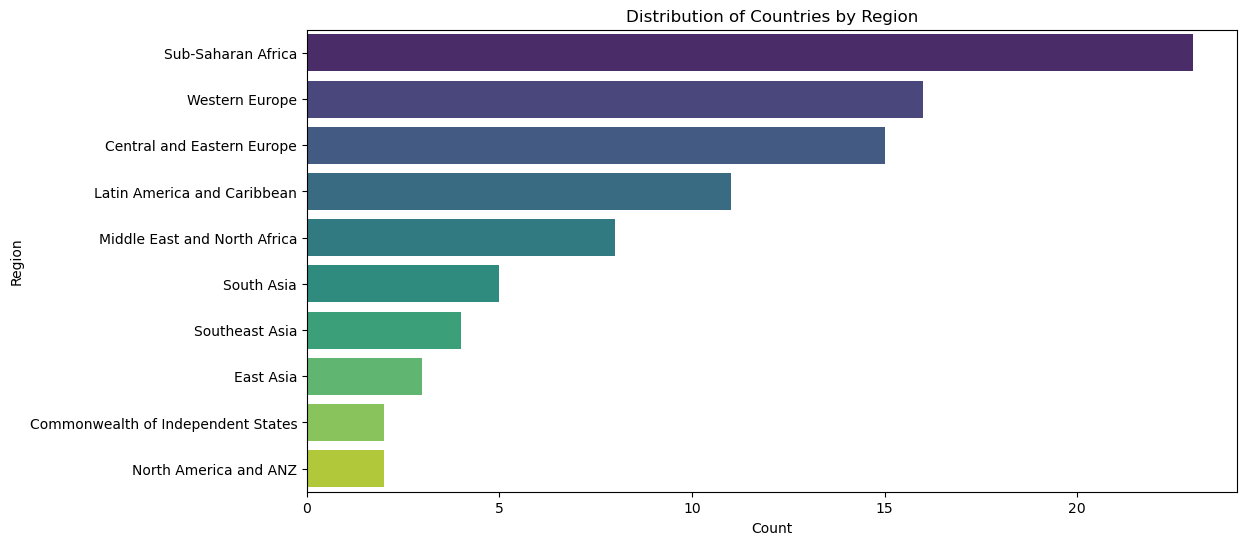

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'region'
plt.figure(figsize=(12, 6))
sns.countplot(y=X_train['region'], order=X_train['region'].value_counts().index, palette="viridis")
plt.title("Distribution of Countries by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()


Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

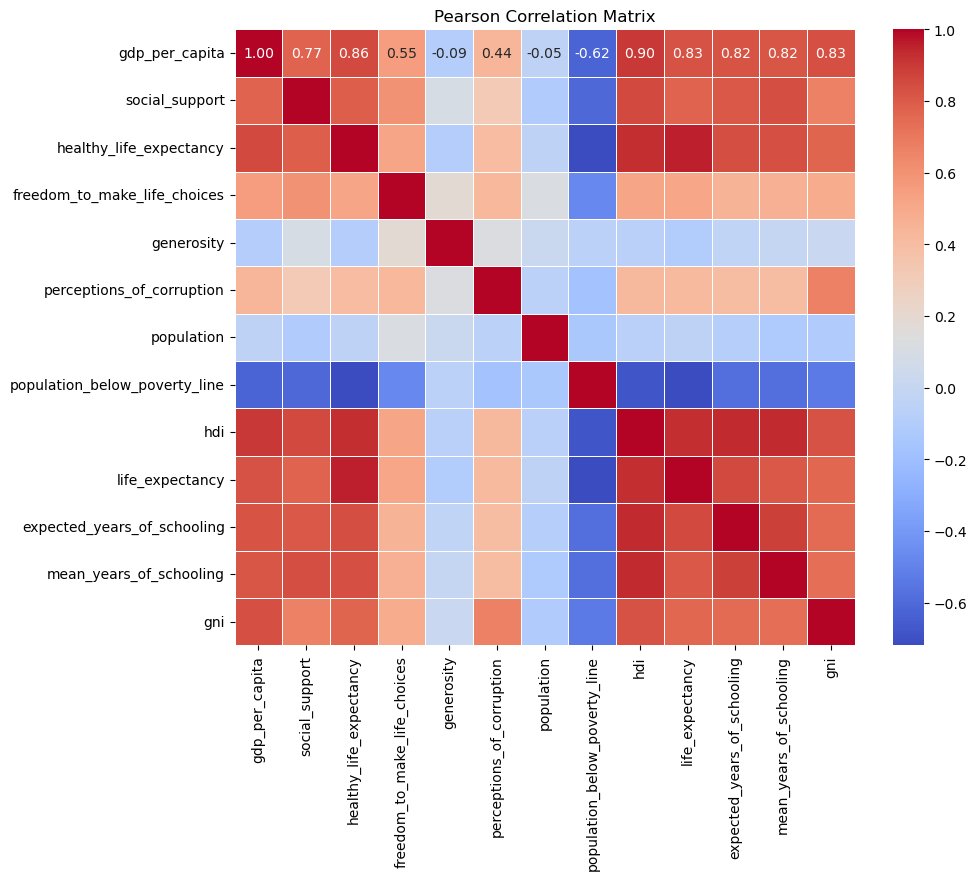

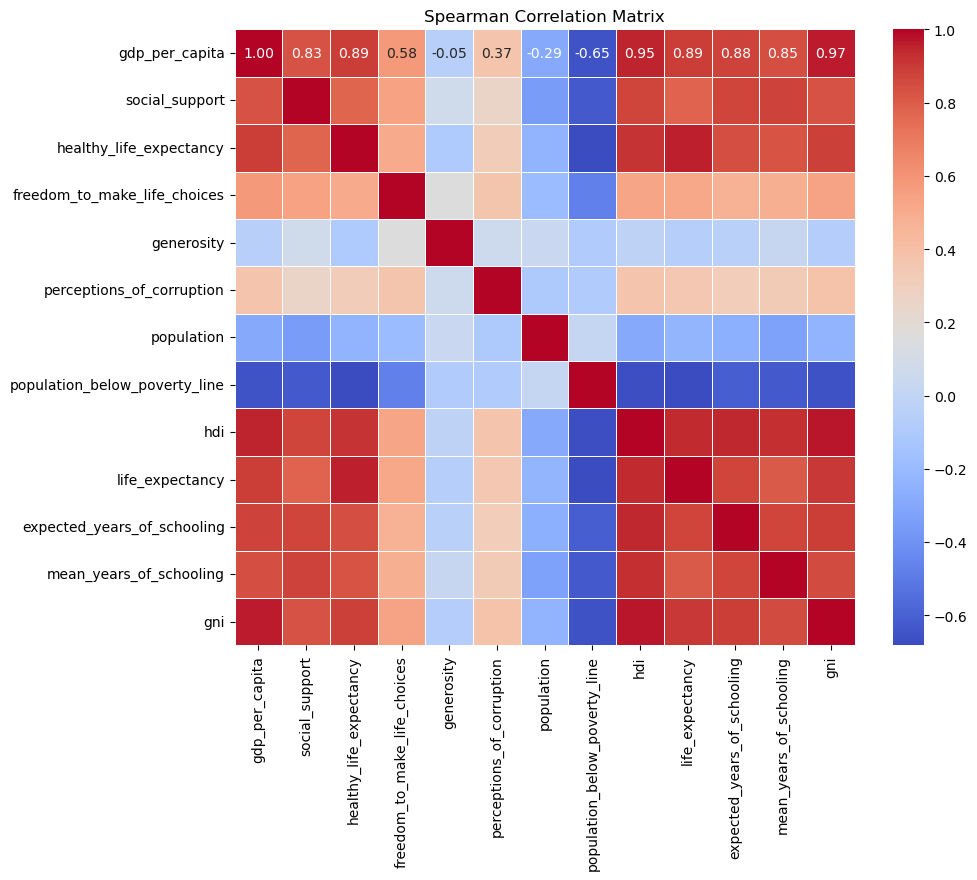

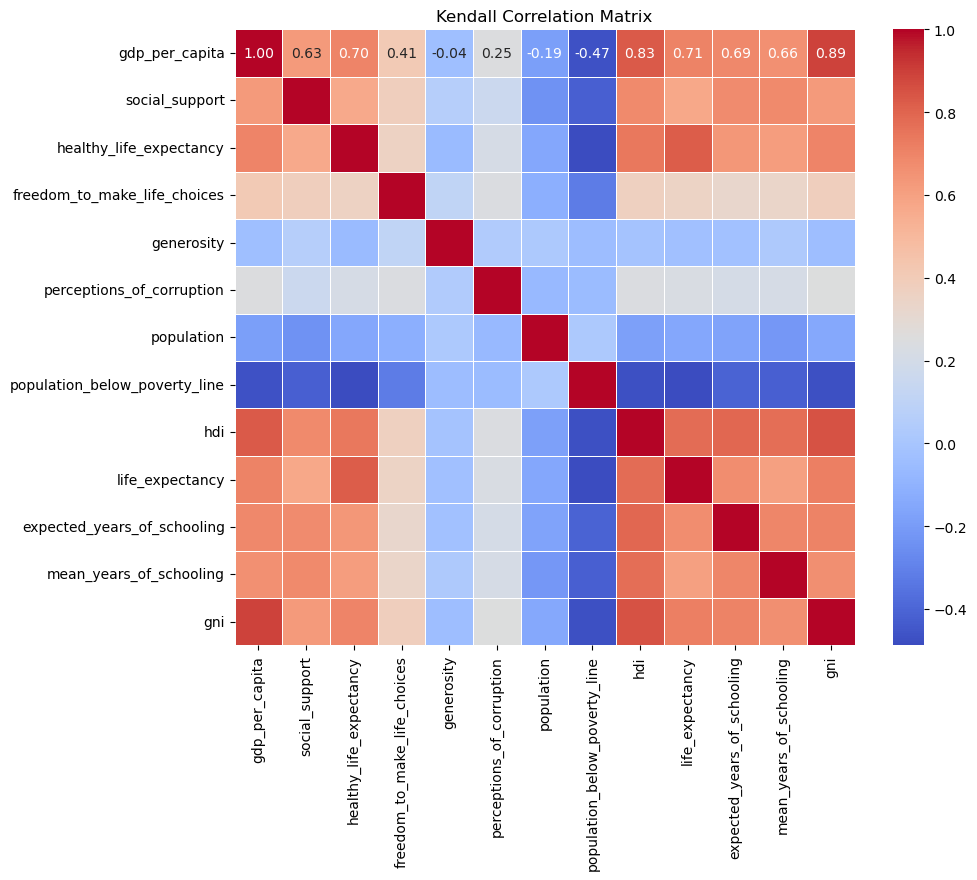

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for correlation analysis
num_features = X_train.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrices
pearson_corr = num_features.corr(method='pearson')
spearman_corr = num_features.corr(method='spearman')
kendall_corr = num_features.corr(method='kendall')

# Function to plot correlation heatmap
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot heatmaps
plot_correlation_heatmap(pearson_corr, "Pearson Correlation Matrix")
plot_correlation_heatmap(spearman_corr, "Spearman Correlation Matrix")
plot_correlation_heatmap(kendall_corr, "Kendall Correlation Matrix")


Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

                               gdp_per_capita  social_support  \
gdp_per_capita                       1.000000        0.773208   
social_support                       0.773208        1.000000   
healthy_life_expectancy              0.857779        0.787358   
freedom_to_make_life_choices         0.550961        0.598713   
generosity                          -0.094037        0.096238   
perceptions_of_corruption            0.438849        0.318925   
population                          -0.045583       -0.109651   
population_below_poverty_line       -0.620790       -0.605304   
hdi                                  0.902386        0.855297   
life_expectancy                      0.830886        0.774096   
expected_years_of_schooling          0.820940        0.809587   
mean_years_of_schooling              0.815423        0.845490   
gni                                  0.834177        0.667188   
region_encoded                      -0.144506       -0.302877   

                        

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

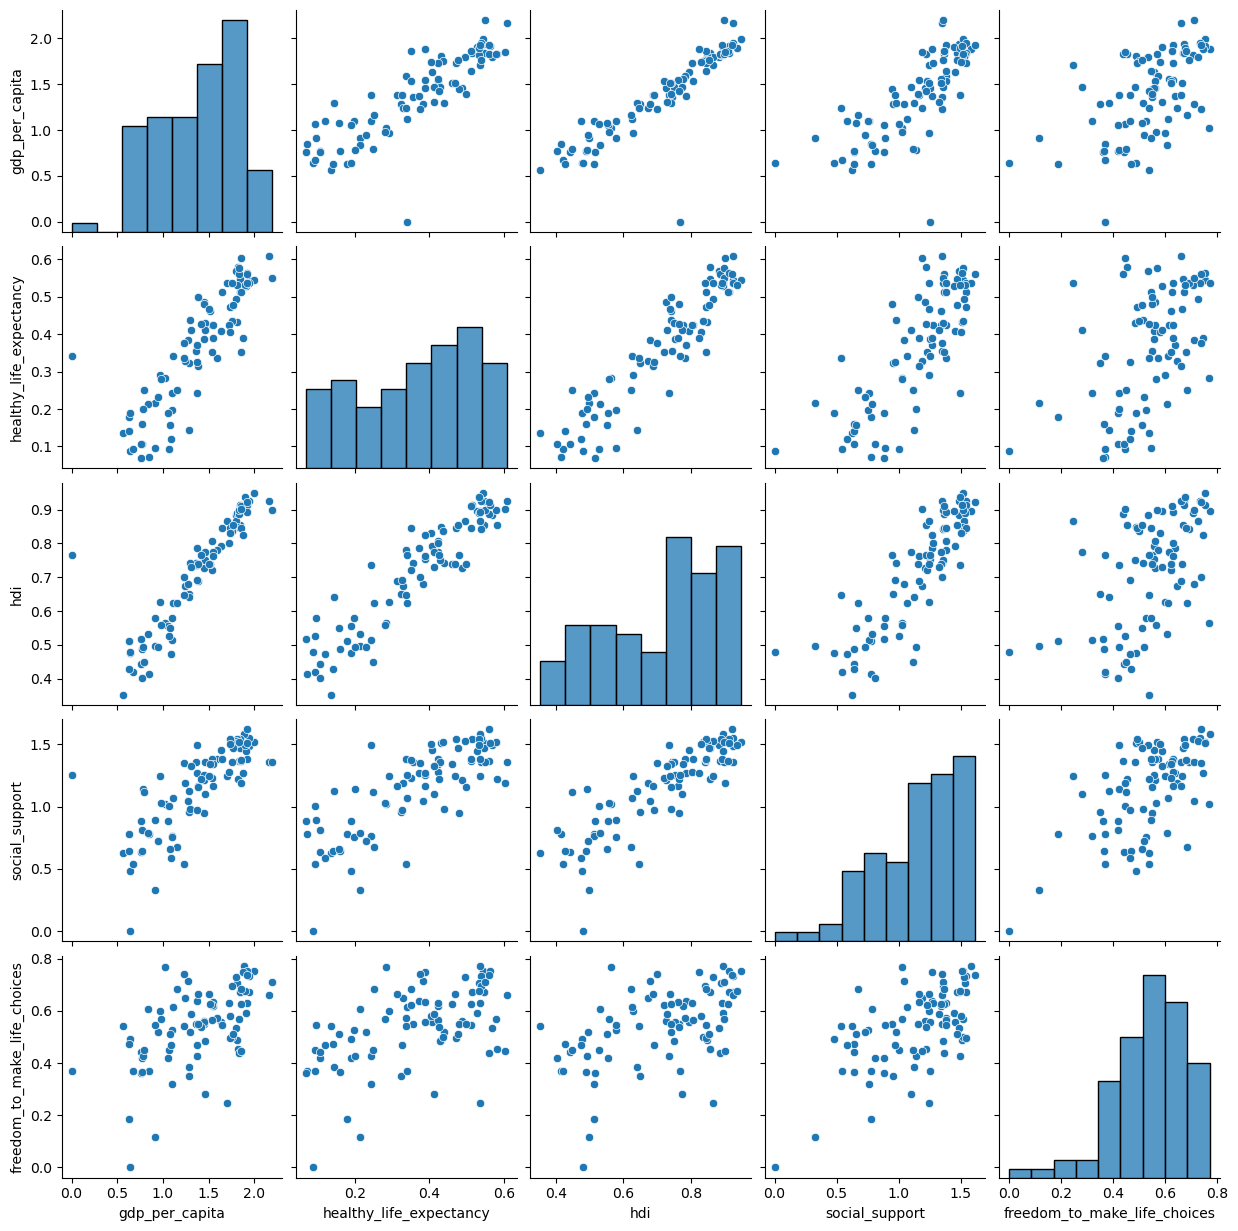

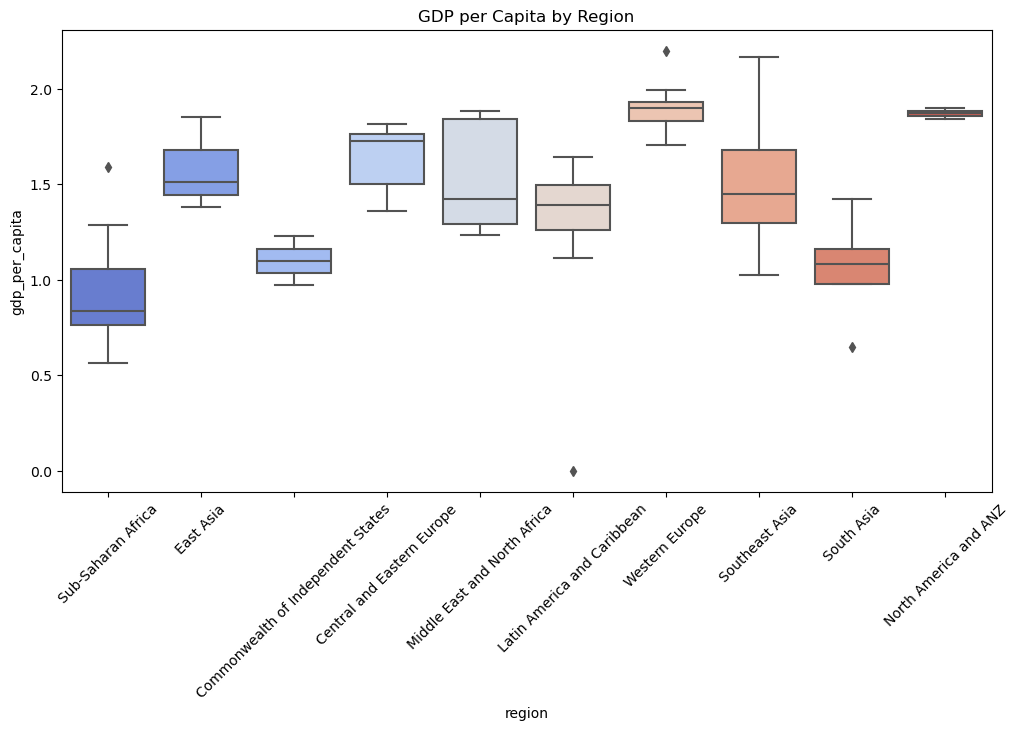

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


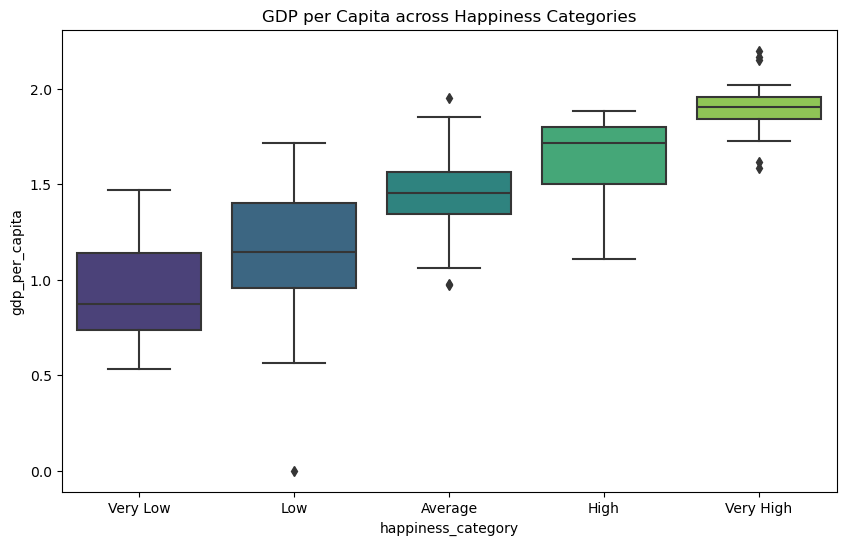

In [23]:
# CORRELATION:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode 'region' as numbers
le = LabelEncoder()
X_train['region_encoded'] = le.fit_transform(X_train['region'])

# Drop original 'region' and compute correlation
X_train_numeric = X_train.drop(columns=['country', 'region']).select_dtypes(include=['number'])
correlation_matrix = X_train_numeric.corr(method='pearson')
print(correlation_matrix)


# VISUALIZING RELATIONS
import seaborn as sns
import matplotlib.pyplot as plt

# Select important numerical features
num_features = ['gdp_per_capita', 'healthy_life_expectancy', 'hdi', 'social_support', 'freedom_to_make_life_choices']

# Pairplot for key numerical features
sns.pairplot(X_train[num_features])
plt.show()


# CATEGORICAL VS NUMERICAL ANALYSIS
# Boxplot: GDP per capita across regions
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train, x='region', y='gdp_per_capita', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("GDP per Capita by Region")
plt.show()

# ASSOCIATION WITH TARGET VARIABLES happiness_category:
# Boxplot of happiness categories vs. GDP per capita
plt.figure(figsize=(10, 6))
sns.boxplot(data=whr_df, x='happiness_category', y='gdp_per_capita', palette="viridis")
plt.title("GDP per Capita across Happiness Categories")
plt.show()




Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

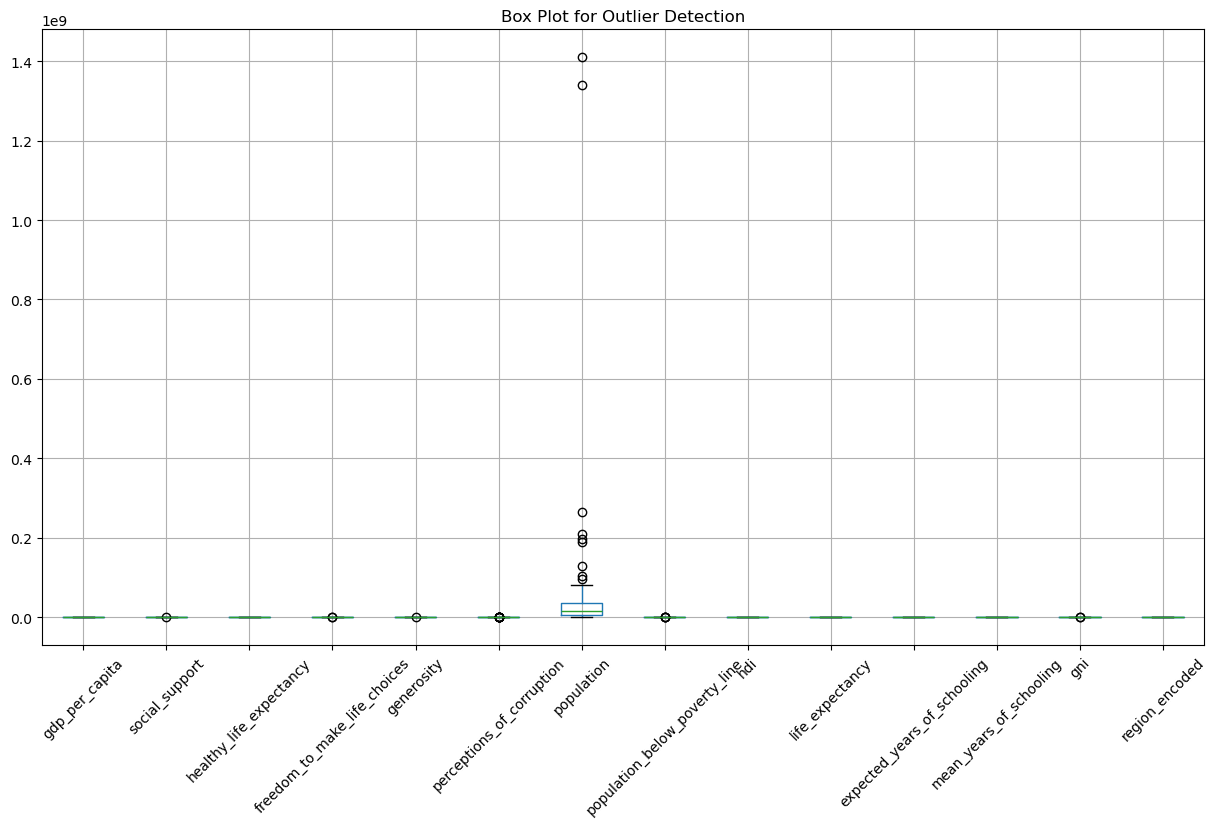

Number of outliers detected per feature:
 gdp_per_capita                   1
social_support                   1
healthy_life_expectancy          0
freedom_to_make_life_choices     1
generosity                       1
perceptions_of_corruption        1
population                       2
population_below_poverty_line    0
hdi                              0
life_expectancy                  0
expected_years_of_schooling      0
mean_years_of_schooling          0
gni                              0
region_encoded                   0
dtype: int64
Number of outliers detected per feature (IQR method):
 gdp_per_capita                    0
social_support                    1
healthy_life_expectancy           0
freedom_to_make_life_choices      2
generosity                        1
perceptions_of_corruption        10
population                        9
population_below_poverty_line     4
hdi                               0
life_expectancy                   0
expected_years_of_schooling       0
mean

In [25]:
# BOX PLOT
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numeric_columns = X_train.select_dtypes(include=['number']).columns

# Plot box plots for key numerical features
plt.figure(figsize=(15, 8))
X_train[numeric_columns].boxplot(rot=45)  # Rotate labels for readability
plt.title("Box Plot for Outlier Detection")
plt.show()

# Z-SCORE
from scipy.stats import zscore
import numpy as np

# Compute Z-scores for numerical columns
z_scores = np.abs(X_train[numeric_columns].apply(zscore))

# Define threshold (values greater than 3 are outliers)
threshold = 3
outliers = (z_scores > threshold).sum()

# Print number of outliers per feature
print("Number of outliers detected per feature:\n", outliers)

# IQR
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X_train[numeric_columns].quantile(0.25)
Q3 = X_train[numeric_columns].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = ((X_train[numeric_columns] < lower_bound) | (X_train[numeric_columns] > upper_bound)).sum()

# Print number of outliers per feature
print("Number of outliers detected per feature (IQR method):\n", outliers_iqr)




Write what you observed and your General comments on what should be done:

In [ ]:
# Your comments here

## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any). 

In [31]:
import numpy as np

# Calculate skewness for numerical features
skewness = X_train.select_dtypes(include=['number']).skew()

# Display skewness
print("Skewness of numerical features:\n", skewness)

# Identify features with high skewness (commonly > 0.75)
skewed_features = skewness[skewness > 0.75].index
print("\nHighly skewed features:\n", skewed_features)

# Apply log transformation
X_train[skewed_features] = np.log1p(X_train[skewed_features] + 1e-6)
X_test[skewed_features] = np.log1p(X_test[skewed_features] + 1e-6)

print("\nLog transformation applied to skewed features.")

# Recalculate skewness after transformation
skewness_after = X_train[skewed_features].skew()
print("\nSkewness after log transformation:\n", skewness_after)


Skewness of numerical features:
 gdp_per_capita                  -0.479901
social_support                  -0.901927
healthy_life_expectancy         -0.361999
freedom_to_make_life_choices    -0.955485
generosity                       0.518887
perceptions_of_corruption       -0.002545
population                       0.172724
population_below_poverty_line   -0.436395
hdi                             -0.453412
life_expectancy                 -0.632233
expected_years_of_schooling     -0.206557
mean_years_of_schooling         -0.437315
gni                             -0.414228
region_encoded                  -0.410453
dtype: float64

Highly skewed features:
 Index([], dtype='object')

Log transformation applied to skewed features.

Skewness after log transformation:
 Series([], dtype: float64)


Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [35]:
#YOUR CODE HERE?
# Create an interaction feature: GDP per capita * Social support
X_train['gdp_social_interaction'] = X_train['gdp_per_capita'] * X_train['social_support']
X_test['gdp_social_interaction'] = X_test['gdp_per_capita'] * X_test['social_support']

# Verify the new feature
print(X_train[['gdp_per_capita', 'social_support', 'gdp_social_interaction']].head())



## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [44]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Check available columns
print("Columns in X_train:", X_train.columns)

# Select numeric features
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean
    ('scaler', StandardScaler())  # Standardize numeric data (zero mean, unit variance)
])

# Define categorical features (Check if they exist in X_train)
categorical_features = ['region', 'sub-region']
existing_categorical_features = [col for col in categorical_features if col in X_train.columns]

if not existing_categorical_features:
    raise ValueError("None of the specified categorical features are found in X_train!")

# Replace missing values with the mode and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, existing_categorical_features)
])

# Fit the preprocessor on X_train
preprocess = preprocessor.fit(X_train)

print("Preprocessing pipeline fitted successfully!")


Columns in X_train: Index(['country', 'region', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
Preprocessing pipeline fitted successfully!


Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

1. Identifying numerical and categorical features. All numerical features were extracted by dropping non-numeric columns from X_train. Machine learning often requires numerical inputs, so they must be separated for appropriate transformation. Categorical variables were manually specified since they require imputation and encoding.
2. A pipeline for numerical features was created. numeric_transformer processes numerical data through imputation (because using 0 as a filler might not be ideal for all cases), and standardization (because it scales numerical features to have mean = 0 and variance = 1, improving model performance, specifically for distance-based models like SVM and KNN). 
3. Pipeline for categorical features. categorical_transformer processes categorical data through imputation (missing values are replaced with the most frequent (mode) value to prevent data loss and maintain category consistency), and one-hot encoding  (converts categorical values into binary columns. handle_unknown='ignore' was done to prevent errors from unseen categories) 
4. ColumnTransformer was used to apply transformations (numeric_transformer on numeric_features and categorical_transformer on categorical_features). It ensures numerical and categorical processing happens simultaneously and keeps the data pipeline clean and modular.
5. Fitting the Preprocessor this learns the imputation values, scaling parameters, and one-hot encoding mappings based on X_train.

   
CHANGES MADE:
1. Changed numeric imputation from 0 to mean for better data representation
2. Explicitly filled missing categorical values using most_frequent to prevent data loss.
3. Used handle_unknown='ignore' in OneHotEncoder to handle unseen categories.

In [47]:
# Write function to transform data with preprocessor

def transform_data(data):
    data = data.drop(['country', 'region'], axis=1)  # To avoid modifying original data
    preprocessed_data = preprocess.transform(data)
    return preprocessed_data


What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

1. preprocessor object: It is a ColumnTransformer object that specifies how numerical and categorical features should be transformed. It acts as a blueprint that tells us how transformations should be applied
2. preprocess object: It is a fitted ColumnTransformer object (i.e., the preprocessor object after being trained on X_train). It learns the imputation values, scaling parameters, and one-hot encoding mapping for categorical features. It is ready to transform a new dataset.
3. preprocessor function: It is a Python function that applies the fitted preprocess object to transform new data.
4. preprocessed_data: It is the final transformed version of the input data, where:
Missing values have been imputed, numeric columns have been standardized, and categorical variables have been one-hot encoded. It is ready for model training or prediction.

In [48]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(109, 16)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets (if not already split)
X_train_processed = preprocess.transform(X_train)  # Transform training data
X_test_processed = preprocess.transform(X_test)    # Transform test data

# Define the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the preprocessed training data
model.fit(X_train_processed, y_train)

# Predict on the test data
y_pred = model.predict(X_test_processed)

# Compute accuracy score
score = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {score:.4f}")  # Should be between 0 and 1


Model Accuracy: 0.5714


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [ ]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = model.predict(X_test_processed)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate a comparison DataFrame
comparison_df = pd.DataFrame({
    'True Label': y_test.values,  # Convert to numpy array if y_test is a pandas Series
    'Predicted Label': y_pred
})

# Display first 10 predictions vs true labels
print("Comparison of True vs Predicted Labels:")
print(comparison_df.head(10))

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

## 6. Repeat the process with different parameters to improve the accuracy


In [ ]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Define Model 2 (Random Forest with different hyperparameters)
model_2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train Model 2
model_2.fit(X_train_processed, y_train)

# Predict using Model 2
y_pred_2 = model_2.predict(X_test_processed)

# Compute accuracy score
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Model_2 Accuracy: {accuracy_2:.4f}")

# Generate a comparison DataFrame
comparison_df_2 = pd.DataFrame({
    'True Label': y_test.values,
    'Predicted Label (Model_2)': y_pred_2
})

# Display first 10 predictions vs true labels
print("Comparison of True vs Predicted Labels (Model_2):")
print(comparison_df_2.head(10))

# Classification report for Model_2
print("\nClassification Report (Model_2):")
print(classification_report(y_test, y_pred_2))

# Confusion Matrix for Model_2
print("\nConfusion Matrix (Model_2):")
print(confusion_matrix(y_test, y_pred_2))


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer :Increased the number of trees (n_estimators) in RandomForestClassifier from 100 to 200
Set max_depth=10 instead of leaving it as default (None)

In [ ]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(X_test_processed)

## Write code to show model performance by comparing prediction_labels with true labels
accuracy = accuracy_score(y_test, prediction_labels)
conf_matrix = confusion_matrix(y_test, prediction_labels)
class_report = classification_report(y_test, prediction_labels)

# Print results
print(f"Model 2 Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## Your answer: No, despite that when tweaking the paramemters manually can yield better perfimance, it is time consuming and prone to errors. Alternatively, Automated Hyperparameter Tuning would me more appropriate.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_estimators': np.arange(50, 301, 50),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Depth of the trees
    'min_samples_split': np.arange(2, 11, 2),  # Min samples to split a node
    'min_samples_leaf': np.arange(1, 6, 1)  # Min samples per leaf
}

# Create GridSearchCV object
gridmodel = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit model to training data
gridmodel.fit(X_train_processed, y_train)

# Extract best score and parameters
print("Best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("Best parameters: {}".format(gridmodel.best_params_))

# Train final model using the best parameters
best_rf_model = gridmodel.best_estimator_

# Make predictions on the test set
y_pred_grid = best_rf_model.predict(X_test_processed)

# Evaluate model performance
from sklearn.metrics import accuracy_score
grid_accuracy = accuracy_score(y_test, y_pred_grid)
print(f"GridSearchCV Model Accuracy: {grid_accuracy:.4f}")

In [ ]:
#Submit Model 3:

# Generate predicted values for Model 3
y_pred_model3 = best_rf_model.predict(X_test_processed)

# Evaluate Model 3 performance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Compute accuracy
model3_accuracy = accuracy_score(y_test, y_pred_model3)
print(f"Model 3 Accuracy: {model3_accuracy:.4f}")

# Generate classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_model3))

# Generate confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_model3))


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1.0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}


#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels
# Evaluate performance
    accuracy = accuracy_score(y_test, prediction_labels)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    print("\nClassification Report:\n", classification_report(y_test, prediction_labels))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, prediction_labels))

print("\nModel evaluation complete!")

Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer:GradientBoostingClassifier I defined;n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42. It worked because,learning_rate=0.1 ensured gradual improvement, preventing overfitting, max_depth=3 kept trees simple, balancing bias and variance, subsample=0.8 added randomness, improving generalization.
#BaggingClassifier - max_depth=5 it worked because max_depth=5 in DecisionTreeClassifier prevented overfitting.
#KNeighborsClassifier - n_neighbors=5, weights='distance'. It workded because n_neighbors=5 balanced bias and variance & weights='distance' gave more importance to closer points, improving classification.

## 7. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=X_train_processed.shape[1]#count features in input data

keras_model = Sequential([
    Sequential([
    Dense(128, activation='relu', input_shape=(feature_count,)),  
    Dense(64, activation='relu'),  
    Dense(64, activation='relu'),  
    Dense(32, activation='relu'),  
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])## Define a Neural Network Model with 5 layers 128->64->64->32->(?)

#Use Softmax activation in last layer. How many neurons should there be in the last layer?



# Compile model
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer:In the middle layers of the neural network, I used the ReLU (Rectified Linear Unit) activation function for all layers.
#Sofmax was used bacause it ensures the output values sum to 1, treating them as probabilities.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer:categorical_crossentropy is used because it measures the difference between the predicted probability distribution (from Softmax) and the true one-hot encoded labels, making it ideal for multi-class classification.
#(Stochastic Gradient Descent) is chosen for its simplicity and ability to generalize well, but it may converge slowly or get stuck in local minima.
# I would changeSGD 

Can you try getting the model's training history out and plotting the curves?

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)import matplotlib.pyplot as plt

# Extract loss and accuracy from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot both loss and accuracy in the same figure
plt.figure(figsize=(10, 5))

# Loss curve
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red', linestyle='dashed')

# Accuracy curve
plt.plot(accuracy, label='Training Accuracy', color='green')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange', linestyle='dashed')

# Labels & title
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('Training and Validation Loss/Accuracy Curves')
plt.legend()
plt.show()


In [ ]:
#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index= np.argmax(keras_model.predict(X_test), axis=1)# Predict

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels
# Convert true labels to their categorical representation
true_labels = [y_train.columns[i] for i in np.argmax(y_test.values, axis=1)]

# Evaluate Model Performance
accuracy = accuracy_score(true_labels, prediction_labels)
print(f"Model Accuracy: {accuracy:.4f}")

# Display Classification Report
print("Classification Report:")
print(classification_report(true_labels, prediction_labels))


Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [ ]:
# Your code here:from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import SGD

# Define the model with Dropout and Batch Normalization
keras_model = Sequential([
    Dense(128, input_shape=(feature_count,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),  # Dropout added for regularization

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax
])

# Compile the model
keras_model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)

# Train the model and store the history
history = keras_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=32,
    verbose=1
)
import matplotlib.pyplot as plt

# Extract training and validation loss/accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()



In [ ]:
# Your comments about the change in performance

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

In [ ]:
# Your code here:from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import SGD
from keras.layers import LeakyReLU

# Define models with different activation functions
activation_functions = ['relu', 'tanh', 'sigmoid', LeakyReLU(alpha=0.01)]

models = {}

for activation in activation_functions:
    keras_model = Sequential([
        Dense(128, input_shape=(feature_count,)),
        BatchNormalization(),
        Activation(activation) if isinstance(activation, str) else activation,
        Dropout(0.3),

        Dense(64),
        BatchNormalization(),
        Activation(activation) if isinstance(activation, str) else activation,
        Dropout(0.3),

        Dense(64),
        BatchNormalization(),
        Activation(activation) if isinstance(activation, str) else activation,
        Dropout(0.3),

        Dense(32),
        BatchNormalization(),
        Activation(activation) if isinstance(activation, str) else activation,
        Dropout(0.3),

        Dense(y_train.shape[1], activation='softmax')  # Output layer
    ])

    # Compile the model
    keras_model.compile(
        loss='categorical_crossentropy',
        optimizer=SGD(learning_rate=0.01, momentum=0.9),
        metrics=['accuracy']
    )

    print(f"\nTraining Model with {activation} activation:\n")
    
    # Train model
    history = keras_model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,  # Reduced for faster comparison
        batch_size=32,
        verbose=1
    )

    models[activation] = history  # Store training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for activation, history in models.items():
    plt.plot(history.history['val_accuracy'], label=f'{activation} Validation Acc')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Activation Functions')
plt.legend()
plt.show()


## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
# Define an explainer that will help us interpret the model's decisions
# (Hint: Use shap.Explainer with the trained model and X_test data)

explainer = shap.Explainer(keras_model, X_test)## Initialize SHAP explainer using the trained model

# Compute SHAP values for X_test
# This step generates Shapley values, which explain how each feature contributes to predictions
shap_values = explainer(X_test)## Apply the explainer to X_test

# Generate SHAP summary plot
# This plot will show which features have the most impact on predictions
shap.summary_plot(## Pass the required parameters to create a summary plot)

# Your cell should output a SHAP summary plot showing the most important features.


<h3> Experimentation

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

In [ ]:
## Your Code and Answer:

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked